# Apriori

In [22]:
import mlxtend
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder

In [23]:
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

        ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

        ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

        ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

      ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

In [24]:
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)    
df=pd.DataFrame(te_ary, columns=te.columns_) 
df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [25]:
from mlxtend.frequent_patterns import apriori
apriori(df, min_support=0.01)

,support,itemsets
0,0.4,(0)
1,0.4,(1)
2,0.6,(2)
3,0.4,(3)
4,0.2,(4)
...,...,...
146,0.2,"(1, 2, 3, 4, 7)"
147,0.2,"(1, 5, 7, 8, 9)"
148,0.2,"(2, 5, 7, 9, 10)"
149,0.2,"(2, 5, 9, 10, 11)"


In [28]:
frequent_itemsets1=apriori(df, min_support=0.5, use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Scarf, Pants)"
5,0.6,"(Skirt, Pants)"


<AxesSubplot:title={'center':'Frequent Items'}>

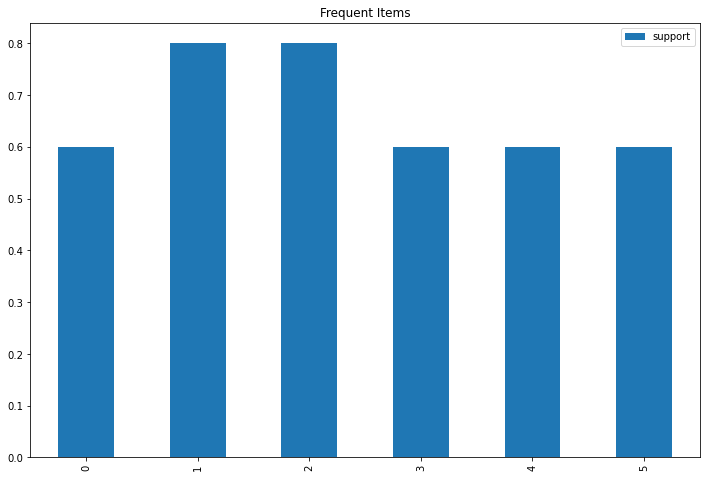

In [53]:
frequent_itemsets1.plot(kind='bar',figsize=(12,8),title="Frequent Items")

In [29]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets1,metric="confidence",min_threshold=.25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf
3,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6


In [31]:
association_rules(frequent_itemsets1,metric="lift",min_threshold=.2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf
3,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6


In [8]:
dataset_2=pd.read_csv("Market_Basket_Optimisation.csv", header=None)
dataset_2=dataset_2.T.apply(lambda x: x.dropna().tolist()).tolist()
dataset_2

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

In [9]:
te=TransactionEncoder()
te_ary=te.fit(dataset_2).transform(dataset_2)    
df=pd.DataFrame(te_ary, columns=te.columns_)  
df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
apriori(df, min_support=0.01)
frequent_itemsets=apriori(df, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(ground beef, milk, mineral water)"
253,0.017064,"(ground beef, spaghetti, mineral water)"
254,0.015731,"(milk, spaghetti, mineral water)"
255,0.010265,"(olive oil, spaghetti, mineral water)"


In [11]:
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.4)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401
1,(olive oil),(mineral water),0.065858,0.238368,0.027596,0.419028,1.757904,0.011898,1.310962
2,(salmon),(mineral water),0.042528,0.238368,0.017064,0.401254,1.683336,0.006927,1.272045
3,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255
4,"(eggs, chocolate)",(mineral water),0.033196,0.238368,0.013465,0.405622,1.701663,0.005552,1.281394
5,"(ground beef, chocolate)",(mineral water),0.023064,0.238368,0.010932,0.473988,1.988472,0.005434,1.447937
6,"(chocolate, milk)",(mineral water),0.032129,0.238368,0.013998,0.435685,1.827780,0.006340,1.349656
7,"(chocolate, spaghetti)",(mineral water),0.039195,0.238368,0.015865,0.404762,1.698053,0.006522,1.279541
8,"(eggs, ground beef)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848
9,"(eggs, milk)",(mineral water),0.030796,0.238368,0.013065,0.424242,1.779778,0.005724,1.322834


In [12]:
a=association_rules(frequent_itemsets,metric="lift",min_threshold=2)